In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# loanamount = float(input("Enter your loan amount? "))
loanamount = 250000

In [3]:
data=pd.read_csv('./datasets/home_loans_history_2018-01-05_1.csv',sep=',')

In [4]:
data2= pd.read_csv('./datasets/new_flex_score.csv', sep=',')

In [5]:
data2.columns

Index(['Company Name + Variation Name', 'Avg. costscore uncapped',
       'flexscore shortlist'],
      dtype='object')

In [6]:
data2['total_score']= (0.7*data2['Avg. costscore uncapped'])+(0.3*data2['flexscore shortlist'])

In [7]:
data2=data2[['Company Name + Variation Name','total_score']]

In [8]:
data["Company Name + Variation Name"] = data["companyname"].map(str) + ' ' + '-' + ' '+data["variationname"]

In [9]:
data['Intial Repayment']=np.where((data['hasintroductoryrate']== False),(loanamount/((1-(1+(data['rate']/1200))**(-360))/((data['rate']/1200))))
            ,([loanamount]/((1-(1+(data['introductoryrate']/1200))**(-360))/((data['introductoryrate']/1200)))))

In [10]:
def func(row):
    if row['homeloantype']=='FIXED':
        return row['Intial Repayment']*((1-(1+(row['rate']/1200))**(-(360-row['fixmonth'])))/((row['rate']/1200)))
    elif ((row['hasintroductoryrate'] == True ) & (row['homeloantype']=='VARIABLE')):
        return row['Intial Repayment']*((1-(1+(row['introductoryrate']/1200))**(-(360-row['introductoryterm'])))/((row['introductoryrate']/1200))) 
    else:
        return ''

data['Balance Outstanding'] = data.apply(func, axis=1)

In [11]:
def func_2(row):
    if (row['homeloantype']=='FIXED'):
        return row['Intial Repayment']*row['fixmonth'] + (row['Balance Outstanding']/((1-(1+(row['revertrate']/1200))**(-(360-row['fixmonth'])))/((row['revertrate']/1200))))*(60-row['fixmonth'])
    elif ((row['hasintroductoryrate'] == True ) & (row['homeloantype']=='VARIABLE')):
        return row['Intial Repayment']*row['introductoryterm'] + (row['Balance Outstanding']/((1-(1+(row['rate']/1200))**(-(360-row['introductoryterm'])))/((row['rate']/1200))))*(60-row['introductoryterm'])
    else:
        return row['Intial Repayment']*60
    
data['Total Repayment']=data.apply(func_2,axis=1)

In [12]:
def func_3(row):
    if ((row['monthlyfees']>0.0)&(row['annualfees'] == 0)):
        return ((row['monthlyfees']*60)+row['upfrontfee']+row['dischargefee'])
    elif ((row['monthlyfees']==0.0)&(row['annualfees'] > 0)):
        return ((row['annualfees']*5)+row['upfrontfee']+row['dischargefee'])
    elif ((row['monthlyfees']==0.0)&(row['annualfees'] == 0)):
        return (row['upfrontfee']+row['dischargefee'])

data['Fees']=data.apply(func_3,axis=1)  

In [13]:
data['Total Cost']= data['Total Repayment']+data['Fees']

In [14]:
def func_4(row):
    if (row['extrarepaymentsvalue']=='5% of original loan amount'):
        return 0.05*loanamount
    else:
        return row['extrarepaymentsvalue']

    
data['extrarepayments_value']=data.apply(func_4,axis=1)

In [15]:
my_data=pd.merge(data,data2,on='Company Name + Variation Name',how='inner')

In [16]:
my_data

,collectiondate,isdiscontinued,uuid,variationuuid,createdat,updatedat,productname,variationname,gotositeenabled,gotositeurl,...,actapplicable,filename,Company Name + Variation Name,Intial Repayment,Balance Outstanding,Total Repayment,Fees,Total Cost,extrarepayments_value,total_score
0,5/1/18,False,0546e8f5-e3b2-47c6-8600-cb3ffd6a3e29,2a645fba-7746-429a-8afa-c001bbffd5f4,9/5/16 12:16,14/8/17 9:40,Ultimate Fixed Home Loan (New Customer),Ultimate Fixed Home Loan 4 Years (New Customer...,False,NaN,...,True,home_loans_history_2018-01-05,Greater Bank - Ultimate Fixed Home Loan 4 Year...,1192.097407,231254,71789.801473,2175.0,73964.801473,12500,3.959512
1,5/1/18,False,0546e8f5-e3b2-47c6-8600-cb3ffd6a3e29,2327c2f6-1e8c-4d8a-a6a5-11e463323be0,9/5/16 12:16,14/12/17 10:14,Ultimate Fixed Home Loan (New Customer),Ultimate Fixed Home Loan 5 Years (New Customer...,False,NaN,...,True,home_loans_history_2018-01-05,Greater Bank - Ultimate Fixed Home Loan 5 Year...,1192.097407,226082,71525.844425,2175.0,73700.844425,12500,3.994064
2,5/1/18,False,be1a3832-fc07-4f8c-8346-b5306381e7e6,10ec54e9-a1b6-41ed-8a82-f21d7b65469d,9/5/16 12:16,3/10/17 11:34,Ultimate Variable Home Loan (New Customer),Ultimate Variable Home Loan (New Customers) (N...,False,NaN,...,True,home_loans_history_2018-01-05,Greater Bank - Ultimate Variable Home Loan (Ne...,1156.370843,,69382.250552,2175.0,71557.250552,0,4.474615
3,5/1/18,False,948ab2f9-08c2-46e6-b000-90be93409e94,9afa0d3f-264f-4aa4-8e7f-27944e135203,9/5/16 12:16,14/8/17 9:37,Great Rate Fixed Home Loan (New Customer),Great Rate Fixed Home Loan 1 Year (New Custome...,False,NaN,...,True,home_loans_history_2018-01-05,Greater Bank - Great Rate Fixed Home Loan 1 Ye...,1149.293911,245355,73475.439117,300.0,73775.439117,12500,3.984299
4,5/1/18,False,948ab2f9-08c2-46e6-b000-90be93409e94,04c79855-8991-4e83-9a69-292641e2e722,9/5/16 12:16,14/8/17 9:37,Great Rate Fixed Home Loan (New Customer),Great Rate Fixed Home Loan 3 Years (New Custom...,False,NaN,...,True,home_loans_history_2018-01-05,Greater Bank - Great Rate Fixed Home Loan 3 Ye...,1163.470671,235769,71628.853627,300.0,71928.853627,12500,4.225981
5,5/1/18,False,300e107e-5b6e-4d86-9411-c84cb7a80962,4280ce88-ee57-422b-9fc7-1a7b860694e7,9/5/16 12:16,3/10/17 11:34,Great Rate Variable Home Loan (New Customer),Great Rate Variable Home Loan (New Customers) ...,False,NaN,...,True,home_loans_history_2018-01-05,Greater Bank - Great Rate Variable Home Loan (...,1156.370843,,69382.250552,300.0,69682.250552,0,4.620015
6,5/1/18,False,a5c1fdad-af1b-47b5-9bd7-2e18c1809386,8bc2bb91-ad1a-43c8-b1c8-5197d12d68b4,30/11/15 14:27,25/7/17 11:23,Ultimate Fixed Investment Loan (Principal and ...,Ultimate Fixed Investment Loan (Principal and ...,False,NaN,...,True,home_loans_history_2018-01-05,Greater Bank - Ultimate Fixed Investment Loan ...,1317.714645,229046,79062.878730,2175.0,81237.878730,0,3.067617
7,5/1/18,False,a5c1fdad-af1b-47b5-9bd7-2e18c1809386,f339844a-6dc1-4eb3-8342-e5874ff951a7,30/11/15 14:27,25/7/17 11:23,Ultimate Fixed Investment Loan (Principal and ...,Ultimate Fixed Investment Loan (Principal and ...,False,NaN,...,True,home_loans_history_2018-01-05,Greater Bank - Ultimate Fixed Investment Loan ...,1272.661974,237421,76030.327633,2175.0,78205.327633,0,3.464517
8,5/1/18,False,a5c1fdad-af1b-47b5-9bd7-2e18c1809386,50daa857-fc7d-41b9-9d41-26bde9e64f01,30/11/15 14:27,25/7/17 11:23,Ultimate Fixed Investment Loan (Principal and ...,Ultimate Fixed Investment Loan (Principal and ...,False,NaN,...,True,home_loans_history_2018-01-05,Greater Bank - Ultimate Fixed Investment Loan ...,1235.711067,245815,75176.925500,2175.0,77351.925500,0,3.576209
9,5/1/18,False,b7906711-d394-4cd7-9934-e90e0a3cd912,e335d8a5-fe40-4640-add8-f02a3616ef5e,30/11/15 14:27,14/8/17 9:39,Ultimate Fixed Home Loan,"Ultimate Fixed Home Loan 4 Years (NSW, ACT & Q...",False,NaN,...,True,home_loans_history_2018-01-05,Greater Bank - Ultimate Fixed Home Loan 4 Year...,1221.084233,231840,73218.087416,2175.0,75393.087416,5,3.832584


In [17]:
my_data=my_data[['extrarepaymentsallowed','allowssplitloan','hasoffsetaccount','hasredrawfacility',
                 'redrawactivationfee','hasfortnightlyrepayments','hasfulloffset','hasmonthlyrepayments',
                 'hasrepayholiday','hasweeklyrepayments','hasmortgageportability',
                 'hasprincipalandinterest','hasinterestonly','hasconstructionfacility','Company Name + Variation Name',
                 'portabilitytransferfee','total_score','extrarepayments_value','Total Cost'
          ]]

In [18]:
my_data=my_data.dropna(subset=['extrarepaymentsallowed','allowssplitloan','hasoffsetaccount','hasredrawfacility',
                 'redrawactivationfee','hasfortnightlyrepayments','hasfulloffset','hasmonthlyrepayments',
                 'hasrepayholiday','hasweeklyrepayments','hasmortgageportability',
                 'hasprincipalandinterest','hasinterestonly','hasconstructionfacility','Company Name + Variation Name',
                 'portabilitytransferfee','total_score','extrarepayments_value','Total Cost'
          ])

In [19]:
my_data.portabilitytransferfee = my_data.portabilitytransferfee.replace([np.NaN,np.nan],0)

In [20]:
my_data.redrawactivationfee=my_data.redrawactivationfee.replace(np.nan, '', regex=True)
my_data['redrawactivationfee'] = pd.to_numeric(my_data['redrawactivationfee'], errors='coerce')
my_data['redrawactivationfee'] = np.nan_to_num(my_data['redrawactivationfee']).astype(float)

In [21]:
my_data['allowssplitloan'] =my_data['allowssplitloan'].astype(int)
my_data['hasfortnightlyrepayments'] =my_data['hasfortnightlyrepayments'].astype(int)
my_data['hasfulloffset'] =my_data['hasfulloffset'].astype(int)
my_data['hasmonthlyrepayments'] =my_data['hasmonthlyrepayments'].astype(int)
my_data['hasoffsetaccount'] =my_data['hasoffsetaccount'].astype(int)
my_data['hasrepayholiday'] =my_data['hasrepayholiday'].astype(int)
my_data['hasweeklyrepayments'] =my_data['hasweeklyrepayments'].astype(int)
my_data['hasmortgageportability'] =my_data['hasmortgageportability'].astype(int)
my_data['hasredrawfacility'] =my_data['hasredrawfacility'].astype(int)
my_data['hasprincipalandinterest'] =my_data['hasprincipalandinterest'].astype(int)
my_data['hasinterestonly'] =my_data['hasinterestonly'].astype(int)
my_data['hasconstructionfacility'] =my_data['hasconstructionfacility'].astype(int)
my_data['extrarepaymentsallowed'] =my_data['extrarepaymentsallowed'].astype(int)
my_data['portabilitytransferfee'] =my_data['portabilitytransferfee'].astype(int)
my_data['redrawactivationfee'] =my_data['redrawactivationfee'].astype(int)
my_data['extrarepayments_value'] =my_data['extrarepayments_value'].astype(int)

In [22]:
data_dummies=my_data[['extrarepaymentsallowed','allowssplitloan','hasoffsetaccount','hasredrawfacility',
                 'redrawactivationfee','hasfortnightlyrepayments','hasfulloffset','hasmonthlyrepayments',
                 'hasrepayholiday','hasweeklyrepayments','hasmortgageportability',
                 'hasprincipalandinterest','hasinterestonly','hasconstructionfacility','Company Name + Variation Name',
                 'portabilitytransferfee','total_score','extrarepayments_value','Total Cost']]

In [23]:
data_dummies.shape

(3243, 19)

In [24]:
data_dummies

,extrarepaymentsallowed,allowssplitloan,hasoffsetaccount,hasredrawfacility,redrawactivationfee,hasfortnightlyrepayments,hasfulloffset,hasmonthlyrepayments,hasrepayholiday,hasweeklyrepayments,hasmortgageportability,hasprincipalandinterest,hasinterestonly,hasconstructionfacility,Company Name + Variation Name,portabilitytransferfee,total_score,extrarepayments_value,Total Cost
0,1,1,0,1,0,1,0,1,0,1,1,1,1,0,Greater Bank - Ultimate Fixed Home Loan 4 Year...,300,3.959512,12500,73964.801473
1,1,1,0,1,0,1,0,1,0,1,1,1,1,0,Greater Bank - Ultimate Fixed Home Loan 5 Year...,300,3.994064,12500,73700.844425
2,1,1,1,1,0,1,0,1,0,1,1,1,1,0,Greater Bank - Ultimate Variable Home Loan (Ne...,300,4.474615,0,71557.250552
3,1,1,0,1,0,1,0,1,0,1,1,1,1,0,Greater Bank - Great Rate Fixed Home Loan 1 Ye...,300,3.984299,12500,73775.439117
4,1,1,0,1,0,1,0,1,0,1,1,1,1,0,Greater Bank - Great Rate Fixed Home Loan 3 Ye...,300,4.225981,12500,71928.853627
5,1,1,0,1,0,1,0,1,0,1,1,1,1,0,Greater Bank - Great Rate Variable Home Loan (...,300,4.620015,0,69682.250552
6,1,1,0,1,0,1,0,1,1,1,1,1,0,0,Greater Bank - Ultimate Fixed Investment Loan ...,300,3.067617,0,81237.878730
7,1,1,0,1,0,1,0,1,1,1,1,1,0,0,Greater Bank - Ultimate Fixed Investment Loan ...,300,3.464517,0,78205.327633
8,1,1,0,1,0,1,0,1,1,1,1,1,0,0,Greater Bank - Ultimate Fixed Investment Loan ...,300,3.576209,0,77351.925500
9,1,1,0,1,0,1,0,1,1,1,1,1,1,0,Greater Bank - Ultimate Fixed Home Loan 4 Year...,300,3.832584,5,75393.087416


In [25]:
y=data_dummies['total_score']
X=data_dummies.drop(['total_score','Company Name + Variation Name'],axis=1)

In [26]:
# data_corr=data_dummies.corr();data_corr

In [27]:
# data_corr.to_csv('correlation.csv',index=None)

# Standardisation

In [28]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn = ss.fit_transform(X)

# TRain-Test Split

In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.20)

/Users/indraja/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Feature Selection

In [30]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error, greater_is_better = False)
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

# Ridge

In [31]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

Best alpha : 0.01
Try again for more precision with alphas centered around 0.01
Best alpha : 0.014
Ridge RMSE on Training set : 0.0280158072024
Ridge RMSE on Test set : 0.0289851815282


In [32]:
ridge_coefs = pd.DataFrame({'abs_coeff':abs(ridge.coef_),'ridge_coeff':ridge.coef_,'input' : X.columns})

In [33]:
test = ridge_coefs.sort_values(['abs_coeff'], ascending=[False]);test

,abs_coeff,input,ridge_coeff
16,0.949566,Total Cost,-0.949566
0,0.146455,extrarepaymentsallowed,0.146455
3,0.106440,hasredrawfacility,0.106440
6,0.057515,hasfulloffset,0.057515
1,0.055239,allowssplitloan,0.055239
13,0.053810,hasconstructionfacility,0.053810
12,0.049933,hasinterestonly,0.049933
11,0.046450,hasprincipalandinterest,0.046450
2,0.042270,hasoffsetaccount,0.042270
15,0.033889,extrarepayments_value,-0.033889


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf = RandomForestRegressor(n_estimators=1200, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [36]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.995
Test data R-2 score: 0.995
Test data Spearman correlation: 0.997
Test data Pearson correlation: 0.997


In [37]:
test_df=pd.DataFrame({'total_score':y_test,'predictions':rf.fit(X_train, y_train).predict(X_test)})

In [38]:
# test_df

# DF

In [39]:
test_df['y_round']= round(y_test,1)
test_df['pred_round']= round(test_df['predictions'],1)
test_df['Difference']= test_df['pred_round']-test_df['y_round']

In [40]:
Accuracy= len(test_df[test_df['Difference']==0])/len(test_df['Difference']); Accuracy*100

62.865947611710325

In [41]:
len(test_df[test_df['Difference']==0])

408

In [42]:
len(test_df['Difference'])

649

In [43]:
max(test_df['Difference'])

0.60000000000000009

In [44]:
min(test_df['Difference'])

-0.20000000000000018

In [45]:
# final=pd.merge(test_df2,data_dummies,on='total_score',how='left')
test_df

,predictions,total_score,y_round,pred_round,Difference
341,4.508776,4.443661,4.4,4.5,0.1
510,3.128996,3.139286,3.1,3.1,0.0
2205,3.021242,3.029348,3.0,3.0,0.0
1578,2.305208,2.264025,2.3,2.3,0.0
4000,3.163779,3.160323,3.2,3.2,0.0
537,2.779740,2.782151,2.8,2.8,0.0
3152,2.493571,2.527549,2.5,2.5,0.0
4155,3.436191,3.435683,3.4,3.4,0.0
656,3.106263,3.101350,3.1,3.1,0.0
4182,2.768116,2.773192,2.8,2.8,0.0


In [46]:
test_df.shape

(649, 5)

In [47]:
# test_df.to_csv("flexscore_predicted.csv",index=None)

# Test

# Test2

In [48]:
test_data1=pd.read_csv('./datasets/home_loans_history_2018-01-05_1.csv',sep=',')

In [49]:
test_data1['Intial Repayment']=np.where((test_data1['hasintroductoryrate']== False),(loanamount/((1-(1+(test_data1['rate']/1200))**(-360))/((test_data1['rate']/1200))))
            ,([loanamount]/((1-(1+(test_data1['introductoryrate']/1200))**(-360))/((test_data1['introductoryrate']/1200)))))

In [50]:
test_data1['Balance Outstanding'] = test_data1.apply(func, axis=1)

In [51]:
test_data1['Total Repayment']=test_data1.apply(func_2,axis=1)

In [52]:
test_data1['Fees']=test_data1.apply(func_3,axis=1)

In [53]:
test_data1['Total Cost']= test_data1['Total Repayment']+test_data1['Fees']

In [54]:
test_data1['extrarepayments_value']=test_data1.apply(func_4,axis=1)

In [55]:
test_data1["Company Name + Variation Name"] = test_data1["companyname"].map(str) + ' ' + '-' + ' '+test_data1["variationname"]

In [56]:
test_data2= pd.read_csv('./datasets/new_flex_score.csv', sep=',')

In [57]:
test_data2['total_score']= (0.7*test_data2['Avg. costscore uncapped'])+(0.3*test_data2['flexscore shortlist'])

In [58]:
test_data2=test_data2[['Company Name + Variation Name','total_score']]

In [59]:
test_data=pd.merge(test_data1,test_data2,on='Company Name + Variation Name',how='inner')

In [60]:
test_data=test_data[['extrarepaymentsallowed','allowssplitloan','hasoffsetaccount','hasredrawfacility',
                 'redrawactivationfee','hasfortnightlyrepayments','hasfulloffset','hasmonthlyrepayments',
                 'hasrepayholiday','hasweeklyrepayments','hasmortgageportability',
                 'hasprincipalandinterest','hasinterestonly','hasconstructionfacility','Company Name + Variation Name',
                 'portabilitytransferfee','extrarepayments_value','total_score','Total Cost'
          ]]

In [61]:
test_data=test_data.dropna(subset=['extrarepaymentsallowed','allowssplitloan','hasoffsetaccount','hasredrawfacility',
                 'redrawactivationfee','hasfortnightlyrepayments','hasfulloffset','hasmonthlyrepayments',
                 'hasrepayholiday','hasweeklyrepayments','hasmortgageportability',
                 'hasprincipalandinterest','hasinterestonly','hasconstructionfacility','Company Name + Variation Name',
                 'portabilitytransferfee','extrarepayments_value','total_score','Total Cost'
          ])

In [62]:
test_data.portabilitytransferfee = test_data.portabilitytransferfee.replace([np.NaN,np.nan],0)

In [63]:
test_data.redrawactivationfee=test_data.redrawactivationfee.replace(np.nan, '', regex=True)
test_data['redrawactivationfee'] = pd.to_numeric(test_data['redrawactivationfee'], errors='coerce')
test_data['redrawactivationfee'] = np.nan_to_num(test_data['redrawactivationfee']).astype(float)

In [64]:
test_data['allowssplitloan'] =test_data['allowssplitloan'].astype(int)
test_data['hasfortnightlyrepayments'] =test_data['hasfortnightlyrepayments'].astype(int)
test_data['hasfulloffset'] =test_data['hasfulloffset'].astype(int)
test_data['hasmonthlyrepayments'] =test_data['hasmonthlyrepayments'].astype(int)
test_data['hasoffsetaccount'] =test_data['hasoffsetaccount'].astype(int)
test_data['hasrepayholiday'] =test_data['hasrepayholiday'].astype(int)
test_data['hasweeklyrepayments'] =test_data['hasweeklyrepayments'].astype(int)
test_data['hasmortgageportability'] =test_data['hasmortgageportability'].astype(int)
test_data['hasredrawfacility'] =test_data['hasredrawfacility'].astype(int)
test_data['hasprincipalandinterest'] =test_data['hasprincipalandinterest'].astype(int)
test_data['hasinterestonly'] =test_data['hasinterestonly'].astype(int)
test_data['hasconstructionfacility'] =test_data['hasconstructionfacility'].astype(int)
test_data['extrarepaymentsallowed'] =test_data['extrarepaymentsallowed'].astype(int)
test_data['portabilitytransferfee'] =test_data['portabilitytransferfee'].astype(int)
test_data['redrawactivationfee'] =test_data['redrawactivationfee'].astype(int)
test_data['extrarepayments_value'] =test_data['extrarepayments_value'].astype(int)

In [65]:
test_dummies=test_data[['extrarepaymentsallowed','allowssplitloan','hasoffsetaccount','hasredrawfacility',
                 'redrawactivationfee','hasfortnightlyrepayments','hasfulloffset','hasmonthlyrepayments',
                 'hasrepayholiday','hasweeklyrepayments','hasmortgageportability',
                 'hasprincipalandinterest','hasinterestonly','hasconstructionfacility','Company Name + Variation Name',
                 'portabilitytransferfee','total_score','extrarepayments_value','Total Cost']]

In [66]:
test_dummies.shape

(3243, 19)

In [67]:
X_test=test_dummies.drop(['Company Name + Variation Name','total_score'],axis=1)

In [68]:
Xn_test = ss.fit_transform(X_test)

In [69]:
test_dummies['output_dtr']=rf.fit(X_train, y_train).predict(Xn_test)
# test_dummies['output_knn']=knnreg.predict(Xn_new_test)

/Users/indraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
test_dummies['Alogarithm']=round(test_dummies['output_dtr'],1)
test_dummies['Manual']=round(test_dummies['total_score'],1)
test_dummies['Difference']=test_dummies['Alogarithm']-test_dummies['Manual']

/Users/indraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/indraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/indraja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [71]:
test_dummies.columns

Index(['extrarepaymentsallowed', 'allowssplitloan', 'hasoffsetaccount',
       'hasredrawfacility', 'redrawactivationfee', 'hasfortnightlyrepayments',
       'hasfulloffset', 'hasmonthlyrepayments', 'hasrepayholiday',
       'hasweeklyrepayments', 'hasmortgageportability',
       'hasprincipalandinterest', 'hasinterestonly', 'hasconstructionfacility',
       'Company Name + Variation Name', 'portabilitytransferfee',
       'total_score', 'extrarepayments_value', 'Total Cost', 'output_dtr',
       'Alogarithm', 'Manual', 'Difference'],
      dtype='object')

In [72]:
test_dummies['Difference'].unique()

array([ 0. , -0.1, -0.1, -0.2,  0.1,  0.1,  0.3,  0.1,  0.6,  0.2, -0.1,
        0.2,  0.2, -0.1,  0.1,  0.2,  0.2, -0.2,  0.1, -0.1,  0.1, -0.2,
        0.6, -0.2, -0.1,  0.4,  0.3,  0.1,  0.2, -0.2])

In [73]:
max(test_dummies['Difference'])

0.60000000000000009

In [74]:
min(test_dummies['Difference'])

-0.20000000000000018

In [75]:
len(test_dummies[test_dummies['Difference']==0.0])

2544

In [76]:
len(test_dummies['Difference'])

3243

In [77]:
test_accuracy=len(test_dummies[test_dummies['Difference']==0.0])/len(test_dummies['Difference']); 
test_accuracy*100

78.44588344125809

In [78]:
test_dummies=test_dummies[['extrarepaymentsallowed', 'allowssplitloan', 'hasoffsetaccount','hasredrawfacility', 
                           'redrawactivationfee', 'hasfortnightlyrepayments','hasfulloffset', 'hasmonthlyrepayments', 
                           'hasrepayholiday','hasweeklyrepayments', 'hasmortgageportability',
                           'hasprincipalandinterest', 'hasinterestonly','hasconstructionfacility',
                           'portabilitytransferfee', 'Company Name + Variation Name','Total Cost','output_dtr', 
                           'total_score', 'Alogarithm', 'Manual','Difference']]

In [79]:
test_dummies.to_csv('investigation_notrans_total_rf_all.csv',index=None)

In [80]:
test_dummies

,extrarepaymentsallowed,allowssplitloan,hasoffsetaccount,hasredrawfacility,redrawactivationfee,hasfortnightlyrepayments,hasfulloffset,hasmonthlyrepayments,hasrepayholiday,hasweeklyrepayments,...,hasinterestonly,hasconstructionfacility,portabilitytransferfee,Company Name + Variation Name,Total Cost,output_dtr,total_score,Alogarithm,Manual,Difference
0,1,1,0,1,0,1,0,1,0,1,...,1,0,300,Greater Bank - Ultimate Fixed Home Loan 4 Year...,73964.801473,3.951581,3.959512,4.0,4.0,0.0
1,1,1,0,1,0,1,0,1,0,1,...,1,0,300,Greater Bank - Ultimate Fixed Home Loan 5 Year...,73700.844425,4.003065,3.994064,4.0,4.0,0.0
2,1,1,1,1,0,1,0,1,0,1,...,1,0,300,Greater Bank - Ultimate Variable Home Loan (Ne...,71557.250552,4.360125,4.474615,4.4,4.5,-0.1
3,1,1,0,1,0,1,0,1,0,1,...,1,0,300,Greater Bank - Great Rate Fixed Home Loan 1 Ye...,73775.439117,3.983038,3.984299,4.0,4.0,0.0
4,1,1,0,1,0,1,0,1,0,1,...,1,0,300,Greater Bank - Great Rate Fixed Home Loan 3 Ye...,71928.853627,4.223630,4.225981,4.2,4.2,0.0
5,1,1,0,1,0,1,0,1,0,1,...,1,0,300,Greater Bank - Great Rate Variable Home Loan (...,69682.250552,4.528070,4.620015,4.5,4.6,-0.1
6,1,1,0,1,0,1,0,1,1,1,...,0,0,300,Greater Bank - Ultimate Fixed Investment Loan ...,81237.878730,3.049947,3.067617,3.0,3.1,-0.1
7,1,1,0,1,0,1,0,1,1,1,...,0,0,300,Greater Bank - Ultimate Fixed Investment Loan ...,78205.327633,3.457125,3.464517,3.5,3.5,0.0
8,1,1,0,1,0,1,0,1,1,1,...,0,0,300,Greater Bank - Ultimate Fixed Investment Loan ...,77351.925500,3.560059,3.576209,3.6,3.6,0.0
9,1,1,0,1,0,1,0,1,1,1,...,1,0,300,Greater Bank - Ultimate Fixed Home Loan 4 Year...,75393.087416,3.816049,3.832584,3.8,3.8,0.0


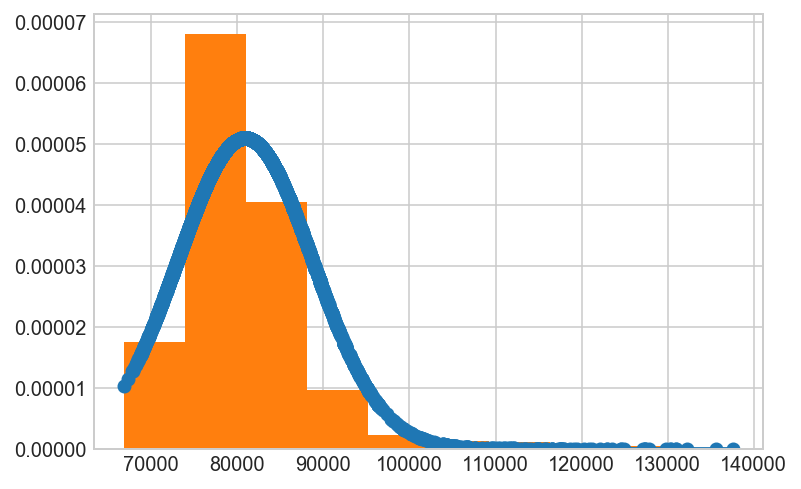

In [81]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = sorted(test_data1['Total Cost'])  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      #use this to draw histogram of your data

pl.show() 

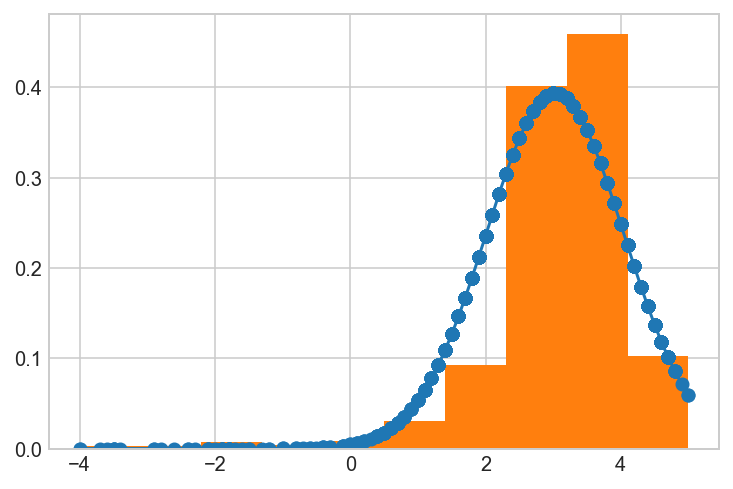

In [82]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = sorted(test_dummies['Alogarithm'])  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      #use this to draw histogram of your data

pl.show() 

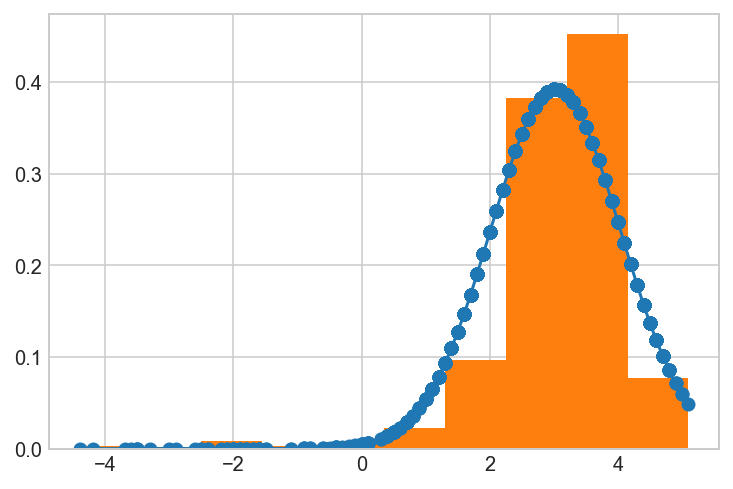

In [83]:
import numpy as np
import scipy.stats as stats
import pylab as pl
h = sorted(test_dummies['Manual'])  #sorted
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
pl.plot(h,fit,'-o')
pl.hist(h,normed=True)      #use this to draw histogram of your data
pl.show()

In [84]:
print (np.mean(test_dummies['Alogarithm']))
print (np.median(test_dummies['Alogarithm']))
from scipy.stats import mode
print (mode(test_dummies['Alogarithm']))

3.0271045328399686
3.2
ModeResult(mode=array([ 3.3]), count=array([206]))
